# Group Project - Proposal

### Group members:
* Audrey Wang 41935289
* Sam Shan 85179604
* Dima Zubkovskii
* Michelle Sui


### Tasks:

* Import data into R
* Clean and wrangle data into a tidy format
* Separate data into training data and test data
* Summarize the training data in tables
    * The number of observations in each class
    * The means of the predictor variables you plan to use in your analysis and 
    * How many rows have missing data
* Visualize the training data
* Further analysis
    * Impact/significance
    * Future questions
* File preparation: HTML, ipynb

In [1]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
URL <- "https://raw.githubusercontent.com/audrey-rw5683/dsci-100-2023w2-group-002-2/main/diabetes.csv"
diabetes <- read_csv(URL)
diabetes

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31.0,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1


Next Task:

In [3]:
diabetes_split <- initial_split(diabetes, prop = 0.8, strata = Outcome)  
diabetes_train <- training(diabetes_split)   
diabetes_test <- testing(diabetes_split)

diabetes_train
diabetes_test

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,85,66,29,0,26.6,0.351,31,0
1,89,66,23,94,28.1,0.167,21,0
5,116,74,0,0,25.6,0.201,30,0
10,115,0,0,0,35.3,0.134,29,0
4,110,92,0,0,37.6,0.191,30,0
10,139,80,0,0,27.1,1.441,57,0
1,103,30,38,83,43.3,0.183,33,0
3,126,88,41,235,39.3,0.704,27,0
8,99,84,0,0,35.4,0.388,50,0


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,197,70,45,543,30.5,0.158,53,1
7,100,0,0,0,30.0,0.484,32,1
10,125,70,26,115,31.1,0.205,41,1
3,158,76,36,245,31.6,0.851,28,1
6,92,92,0,0,19.9,0.188,28,0
7,159,64,0,0,27.4,0.294,40,0
1,146,56,0,0,29.7,0.564,29,0
5,88,66,21,23,24.4,0.342,30,0
0,100,88,60,110,46.8,0.962,31,0


In [4]:
diabetes_outcomes <- diabetes_train |>
                    group_by(Outcome) |>
                    summarize(Outcome = n())

diabetes_outcomes

Outcome
<int>
400
214


In [5]:
diabetes_observations <- diabetes_train |>
                    nrow()

diabetes_observations

[1] 614

In [6]:
# dont know how to do

# diabetes_missing_data <- diabetes_train |>
#                     group_by(Outcome) |>
#                     summarize(Outcome = n())

# diabetes_missing_data

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


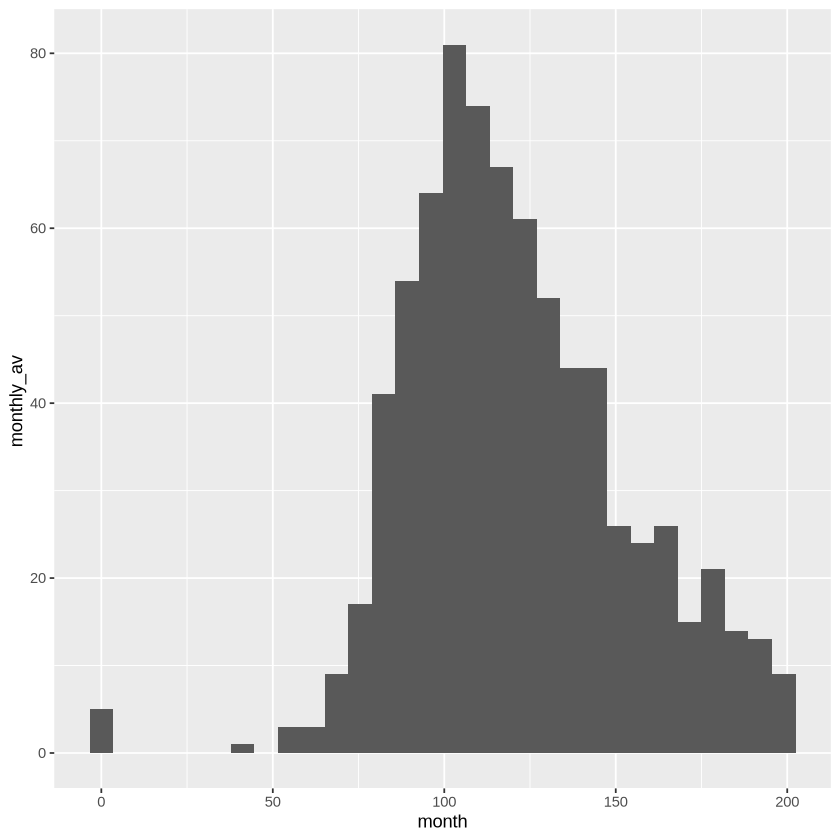

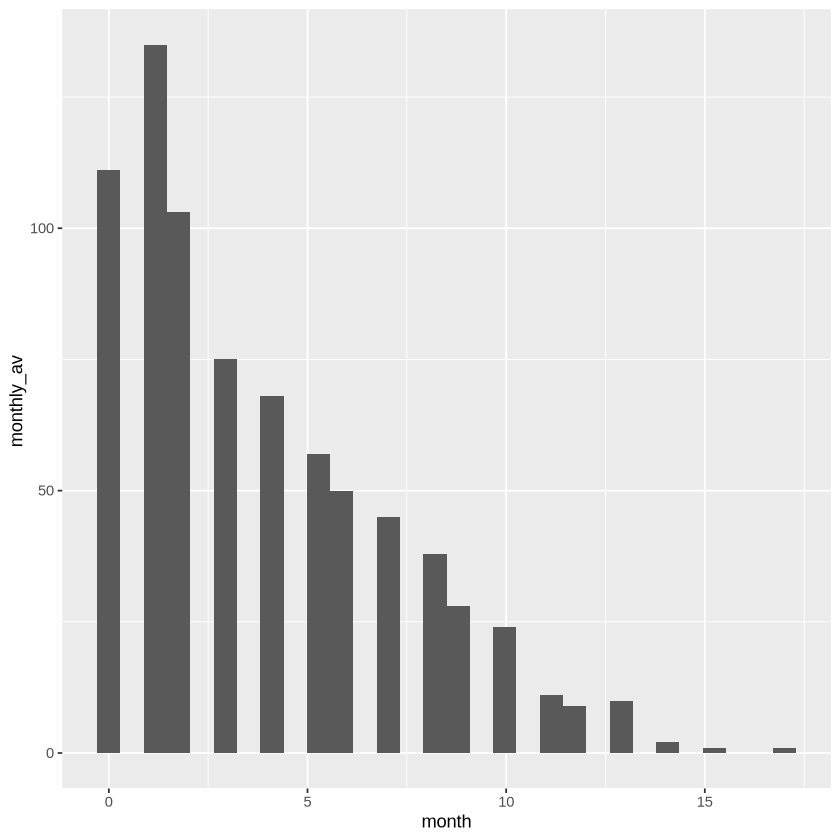

In [14]:
diabetes_pregancies_plot <- diabetes |>
   ggplot(aes(x = Pregnancies)) + 
   geom_histogram() +
   xlab("distribution of pregnancies")

diabetes_glucose_plot <- diabetes |>
   ggplot(aes(x = Glucose)) + 
   geom_histogram() +
   xlab("distribution of glucose") 

diabetes_bloodpressure_plot <- diabetes |>
   ggplot(aes(x = BloodPressure)) + 
   geom_histogram() +
   xlab("distribution of blood pressure levels")

diabetes_skinthickness_plot <- diabetes |>
   ggplot(aes(x = SkinThickness)) + 
   geom_histogram() +
   xlab("distribution of skin thickness") 

diabetes_insulin_plot <- diabetes |>
   ggplot(aes(x = Insulin)) + 
   geom_histogram() +
   xlab("distribution of insulin levels") 

diabetes_predigrees_plot <- diabetes |>
   ggplot(aes(x = DiabetesPedigreeFunction)) + 
   geom_histogram() +
   xlab("distribution of pregnancies") 

diabetes_age_plot <- diabetes |>
   ggplot(aes(x = Age)) + 
   geom_histogram() +
   xlab("distribution of pregnancies")


diabetes_pregancies_plot
diabetes_glucose_plot
diabetes_bloodpressure_plot
diabetes_skinthickness_plot
diabetes_insulin_plot
diabetes_predigrees_plot
diabetes_age_plot